**Aluno: Geraldo Barbosa do Amarante**
 

**Prática da Aula RECONHECIMENTO DE IMAGENS UTILIZANDO IMAGENS DO PROJETO** 



In [ ]:
#Montagem do GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

**IMPORTANDO AS BIBLIOTECAS**

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns 
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import *
from keras.utils import *
from keras.utils import np_utils
from keras.layers import Dropout, Flatten, Input, Dense
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import random
import tensorflow as tf
import cv2 as cv
import os 
import glob

**LENDO E TRATANDO OS DADOS**

In [ ]:
confluente_dir = glob.glob(os.path.join('/content/drive/MyDrive/Visao_Computacional/DataSet/DataSet_Projeto/data_especular_crop/train_images/confluente/', '*'))
esparsa_dir = glob.glob(os.path.join('/content/drive/MyDrive/Visao_Computacional/DataSet/DataSet_Projeto/data_especular_crop/train_images/esparsa/', '*'))
#integra_dir = glob.glob(os.path.join('/content/drive/MyDrive/Visao_Computacional/DataSet/DataSet_Projeto/data_especular_crop/train_images/integra/', '*'))
#rara_dir = glob.glob(os.path.join('/content/drive/MyDrive/Visao_Computacion/al/DataSet/DataSet_Projeto/data_especular_crop/train_images/rara/', '*'))
#X_path = confluente_dir + esparsa_dir + integra_dir + rara_dir
X_path = confluente_dir + esparsa_dir
X = []
for f in X_path:
    print(f)
    X.append(np.array(cv.resize(cv.imread(f), (224,224), interpolation = cv.INTER_AREA))) 
X = np.array(X)
#Normalização dos dados através da divisão por 255
X = X / 255
print(X_path)


/content/drive/MyDrive/Visao_Computacional/DataSet/DataSet_Projeto/data_especular_crop/train_images/confluente/35.png
/content/drive/MyDrive/Visao_Computacional/DataSet/DataSet_Projeto/data_especular_crop/train_images/confluente/52.png
/content/drive/MyDrive/Visao_Computacional/DataSet/DataSet_Projeto/data_especular_crop/train_images/confluente/72_r.png
/content/drive/MyDrive/Visao_Computacional/DataSet/DataSet_Projeto/data_especular_crop/train_images/confluente/79_l.png
/content/drive/MyDrive/Visao_Computacional/DataSet/DataSet_Projeto/data_especular_crop/train_images/confluente/58.png
/content/drive/MyDrive/Visao_Computacional/DataSet/DataSet_Projeto/data_especular_crop/train_images/confluente/71.png
/content/drive/MyDrive/Visao_Computacional/DataSet/DataSet_Projeto/data_especular_crop/train_images/confluente/33.png
/content/drive/MyDrive/Visao_Computacional/DataSet/DataSet_Projeto/data_especular_crop/train_images/confluente/66.png
/content/drive/MyDrive/Visao_Computacional/DataSet/D

**DEFININDO OS LABELS**

In [ ]:
l_confluente = np.zeros(len(confluente_dir))
l_esparsa = np.ones(len(esparsa_dir))
#l_integra = 2*np.ones(len(integra_dir))
#l_rara = 3*np.ones(len(rara_dir))
y = np.concatenate((l_confluente, l_esparsa))
#y = np.concatenate((l_confluente, l_esparsa, l_integra, l_rara))
#y = tf.keras.utils.to_categorical(y, 4)
y = tf.keras.utils.to_categorical(y, 2)
print(y)
l_confluente_string = ['confluente' for i in range(len(confluente_dir))]
l_esparsa_string = ['esparsa' for i in range(len(esparsa_dir))]
#l_rara_string = ['rara' for i in range(len(rara_dir))]
#l_integra_string = ['integra' for i in range(len(integra_dir))]
#y_string = np.concatenate((l_confluente_string, l_esparsa_string, l_integra_string, l_rara_string))
y_string = np.concatenate((l_confluente_string, l_esparsa_string))
print(y_string)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

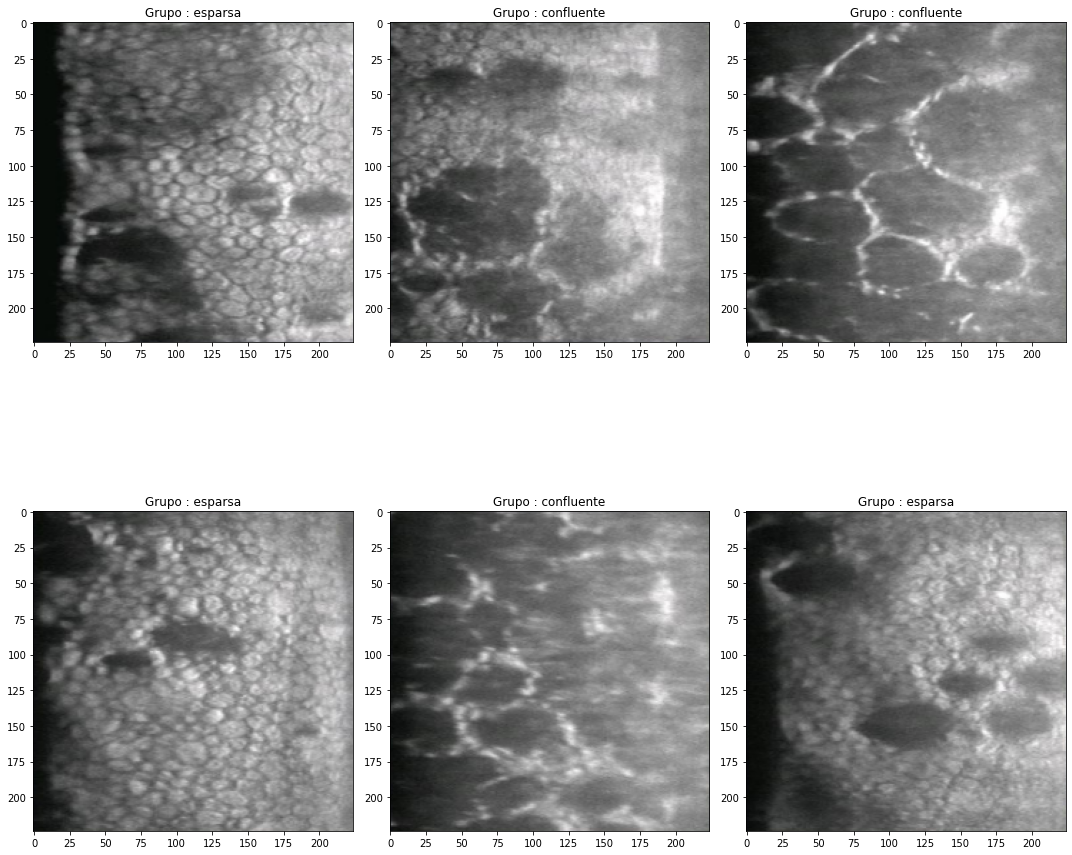

In [ ]:
fig,ax=plt.subplots(2,3)
fig.set_size_inches(15,15)
for i in range(2):
    for j in range (3):
        r = random.randint(0,len(y_string))
        ax[i,j].imshow(X[r][:,:,::-1])
        ax[i,j].set_title('Grupo : ' + y_string[r])
        
plt.tight_layout()

**SEPARANDO TREINAMENTO E VALIDAÇÃO**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)


In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        zoom_range = 0.1, 
        rotation_range= 15, 
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=True,  
        vertical_flip=True)
datagen.fit(X_train)


**REDE NEURAL CONVOLUCIONAL DO ZERO (CNN)**

In [ ]:
inp = Input((224,224,3))
conv1 = Conv2D(64, (5,5), padding='valid', activation= 'relu')(inp)
conv1 = MaxPooling2D(pool_size=(2,2))(conv1)
conv1 = BatchNormalization()(conv1)
conv2 = Conv2D(96, (4,4), padding='valid', activation= 'relu')(conv1)
conv2 = MaxPooling2D(pool_size=(2,2))(conv2)
conv2 = BatchNormalization()(conv2)
conv3 = Conv2D(128, (3,3), padding='valid', activation= 'relu')(conv2)
conv3 = MaxPooling2D(pool_size=(2,2))(conv3)
conv3 = BatchNormalization()(conv3)
conv4 = Conv2D(256, (3,3), padding='valid', activation= 'relu')(conv3)
conv4 = MaxPooling2D(pool_size=(2,2))(conv4)
conv4 = BatchNormalization()(conv4)
flat = Flatten()(conv4)
dense1 = Dense(512, activation= 'relu')(flat)
dense1 = Dropout(0.5)(dense1)
dense2 = Dense(64, activation= 'relu')(dense1)
dense2 = Dropout(0.1)(dense2)
out = Dense(2, activation = 'softmax')(dense2)
#out = Dense(5, activation = 'softmax')(dense2)
model = Model(inp, out)
model.compile(optimizer = tf.keras.optimizers.Nadam(lr = 0.0001) , loss = 'categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 110, 110, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 107, 107, 96)      98400     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 96)       0   

In [ ]:
#Treinamento da CNN
nadam = tf.keras.optimizers.Nadam(lr = 0.0001)
filepath = 'my-CNN.{epoch:02d}-{loss:.2f}-{acc:.2f}-{val_loss:.2f}-{val_acc:.2f}.hdf5'
lr_red = keras.callbacks.ReduceLROnPlateau(monitor='acc', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
chkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
model.compile(optimizer = nadam , loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size = 32, epochs = 2, initial_epoch = 0, validation_data = (X_val, y_val))

Epoch 1/2
4/4 [==============================] - 35s 8s/step - loss: 0.9087 - accuracy: 0.6435 - val_loss: 0.6984 - val_accuracy: 0.4483
Epoch 2/2
4/4 [==============================] - 34s 8s/step - loss: 0.2249 - accuracy: 0.8957 - val_loss: 0.7120 - val_accuracy: 0.4483


**GRÁFICOS**

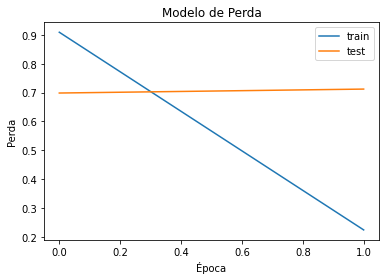

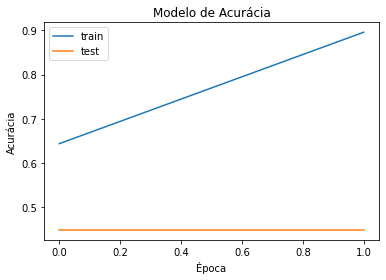

In [ ]:
##Modelo de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelo de Perda')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['train', 'test'])
plt.show()

##Modelo de Acurácia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo de Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['train', 'test'])
plt.show()

**TRANSFER LEARNING**

In [ ]:
vgg = tf.keras.applications.VGG16(input_shape=(224,224,3), include_top = False, weights= 'imagenet')


58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
x = vgg.output
x = Flatten()(x)
x = Dense(3078,activation='relu')(x) 
x = Dropout(0.5)(x)
x = Dense(256,activation='relu')(x) 
x = Dropout(0.2)(x)
out = Dense(5,activation='softmax')(x)
tf_model=Model(inputs=vgg.input,outputs=out)
#Blocando o treinamento das camadas convolucionais
for layer in tf_model.layers[:20]:
  layer.trainable=False

tf_model.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
filepath = 'TF-CNN.{epoch:02d}-{loss:.2f}-{acc:.2f}-{val_loss:.2f}-{val_acc:.2f}.hdf5'
lr_red = keras.callbacks.ReduceLROnPlateau(monitor='acc', patience=3, verbose=1, factor=0.5, min_lr=0.000001)
chkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
tf_model.compile(optimizer = tf.keras.optimizers.Nadam(0.0001) , loss = 'categorical_crossentropy', metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 1, epochs = 2, initial_epoch = 0, validation_data = (X_val, y_val))

Epoch 1/2
115/115 [==============================] - 57s 489ms/step - loss: 1.4026 - accuracy: 0.6696 - val_loss: 1.3245 - val_accuracy: 0.4483
Epoch 2/2
115/115 [==============================] - 56s 490ms/step - loss: 1.2662 - accuracy: 0.7478 - val_loss: 1.8130 - val_accuracy: 0.4483


**GRÁFICOS**

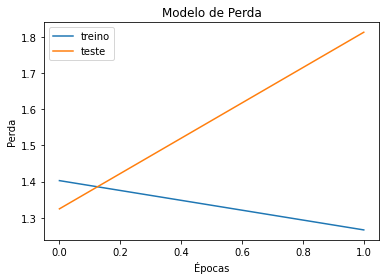

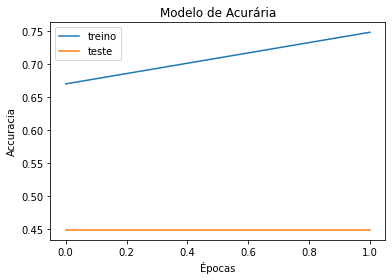

In [ ]:
##Modelo de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelo de Perda')
plt.ylabel('Perda')
plt.xlabel('Épocas')
plt.legend(['treino', 'teste'])
plt.show()

##Modelo de Acurácia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo de Acurária')
plt.ylabel('Accuracia')
plt.xlabel('Épocas')
plt.legend(['treino', 'teste'])
plt.show()

**CLASSIFICANDO ALGUNS EXEMPLOS**

In [ ]:
pred = tf_model.predict(X_val)
pred = np.argmax(pred, axis = 1)
#pred = pd.DataFrame(pred).replace({0:'confluente',1:'esparsa',2:'integra',3:'rara',4:'tulip'})
pred = pd.DataFrame(pred).replace({0:'confluente',1:'esparsa'})

y_val_string = np.argmax(y_val, axis = 1)
#y_val_string = pd.DataFrame(y_val_string).replace({0:'daisy',1:'esparsa',2:'integra',3:'rara',4:'tulip'})
y_val_string = pd.DataFrame(y_val_string).replace({0:'confluente',1:'esparsa'})

In [ ]:
mis_class = []
for i in range(len(y_val_string)):
    if(not y_val_string[0][i] == pred[0][i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

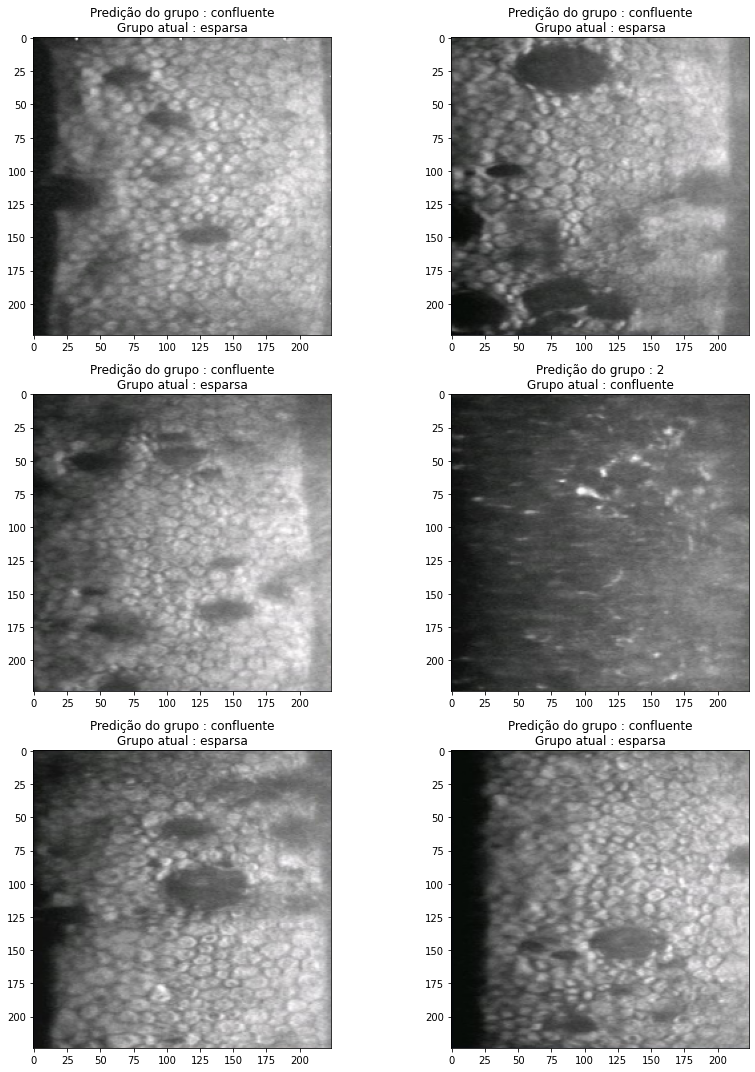

In [ ]:
count = 0
fig,ax = plt.subplots(3,2)
fig.set_size_inches(15,15)
for i in range (3):
    for j in range (2):
        ax[i,j].imshow(X_val[mis_class[count]][:,:,::-1])
        ax[i,j].set_title("Predição do grupo : "+str(pred[0][mis_class[count]])+"\n"+"Grupo atual : " + str(y_val_string[0][mis_class[count]]))
        plt.tight_layout()
        count+=1